## Homework 7

Practice training a deep neural network on the CIFAR10 image dataset:

1. Visualize 20 examples of CIFAR. You can load it with keras.datasets.cifar10.load_data(). The dataset is composed of 60,000 32 × 32–pixel color images (50,000 for training, 10,000 for testing) with 10 classes.

2. Build a DNN with 20 hidden layers of 100 neurons each (that’s too many, but it’s the point of this exercise). Use He initialization and the ELU activation function. (use a for loop!!)

3. Using Adam optimization and early stopping, train the network on the CIFAR10 dataset. You’ll need a softmax output layer with 10 neurons. Remember to search for the right learning rate each time you change the model’s architecture or hyperparameters.

4. Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

5. Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)

6. Paste a link to your Ipython notebook. Make sure all the images are visible and that there are no errors when clicking on the link.  

## Input data

In [3]:
import tensorflow as tf
from tensorflow import keras

from matplotlib import pyplot as plt

In [19]:


# The data, split between train and test sets:
(X_train, y_train), (X_test, y_test) = keras.datasets.cifar10.load_data()
print('x_train shape:', x_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


## Visualize 20 Examples


In [8]:
class_names = ["Airplane", "Automobile", "Bird", "Cat", "Deer",
               "Dog", "Frog", "Horse", "Ship", "Truck"]

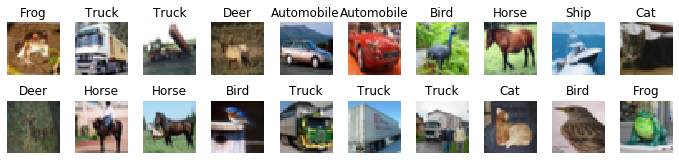

In [32]:
n_rows = 2
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index,0]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

## Building neural network with 20 dense layers

In [37]:
input_shape = (32,32,3)

def model1():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(20):
        model.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    return model


## Using Adam optimization and early stopping, train the network on the CIFAR10 dataset.

In [34]:
# try LR = 0.001
lr = 0.001

model = model1()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model1_lr_1e-3.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 9s 188us/sample - loss: 3.7497 - accuracy: 0.2127 - val_loss: 1.9482 - val_accuracy: 0.2595
Epoch 2/30
50000/50000 [==============================] - 8s 163us/sample - loss: 1.9395 - accuracy: 0.2788 - val_loss: 1.8796 - val_accuracy: 0.3024
Epoch 3/30
50000/50000 [==============================] - 9s 170us/sample - loss: 1.8856 - accuracy: 0.3041 - val_loss: 1.9014 - val_accuracy: 0.2876
Epoch 4/30
50000/50000 [==============================] - 8s 164us/sample - loss: 1.8644 - accuracy: 0.3134 - val_loss: 1.8325 - val_accuracy: 0.3241
Epoch 5/30
50000/50000 [==============================] - 8s 168us/sample - loss: 1.8408 - accuracy: 0.3233 - val_loss: 1.9249 - val_accuracy: 0.3135
Epoch 6/30
50000/50000 [==============================] - 8s 167us/sample - loss: 1.8337 - accuracy: 0.3317 - val_loss: 1.7928 - val_accuracy: 0.3524
Epoch 7/30
50000/50000 [==========================

In [38]:
# try LR = 0.0001
lr = 0.0001

model = model1()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model1_lr_1e-4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history1 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 10s 192us/sample - loss: 3.0203 - accuracy: 0.1893 - val_loss: 2.0372 - val_accuracy: 0.2436
Epoch 2/30
50000/50000 [==============================] - 8s 161us/sample - loss: 1.9841 - accuracy: 0.2731 - val_loss: 1.9060 - val_accuracy: 0.2997
Epoch 3/30
50000/50000 [==============================] - 8s 161us/sample - loss: 1.8874 - accuracy: 0.3067 - val_loss: 1.8684 - val_accuracy: 0.3178
Epoch 4/30
50000/50000 [==============================] - 8s 161us/sample - loss: 1.8317 - accuracy: 0.3324 - val_loss: 1.7707 - val_accuracy: 0.3530
Epoch 5/30
50000/50000 [==============================] - 8s 159us/sample - loss: 1.7776 - accuracy: 0.3543 - val_loss: 1.7732 - val_accuracy: 0.3510
Epoch 6/30
50000/50000 [==============================] - 8s 158us/sample - loss: 1.7244 - accuracy: 0.3772 - val_loss: 1.7249 - val_accuracy: 0.3785
Epoch 7/30
50000/50000 [=========================

In [39]:
# try LR = 0.00005
lr = 5e-5

model = model1()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model1_lr_5e-5.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history2 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 9s 186us/sample - loss: 3.7566 - accuracy: 0.1804 - val_loss: 2.0889 - val_accuracy: 0.2433
Epoch 2/30
50000/50000 [==============================] - 8s 159us/sample - loss: 2.0280 - accuracy: 0.2582 - val_loss: 1.9287 - val_accuracy: 0.2928
Epoch 3/30
50000/50000 [==============================] - 8s 159us/sample - loss: 1.9231 - accuracy: 0.2962 - val_loss: 1.9210 - val_accuracy: 0.2977
Epoch 4/30
50000/50000 [==============================] - 8s 160us/sample - loss: 1.8569 - accuracy: 0.3237 - val_loss: 1.8060 - val_accuracy: 0.3460
Epoch 5/30
50000/50000 [==============================] - 8s 159us/sample - loss: 1.7932 - accuracy: 0.3486 - val_loss: 1.7786 - val_accuracy: 0.3553
Epoch 6/30
50000/50000 [==============================] - 8s 161us/sample - loss: 1.7499 - accuracy: 0.3648 - val_loss: 1.7581 - val_accuracy: 0.3571
Epoch 7/30
50000/50000 [==========================

In [42]:
for i in history.history:
    print(i)

loss
accuracy
val_loss
val_accuracy


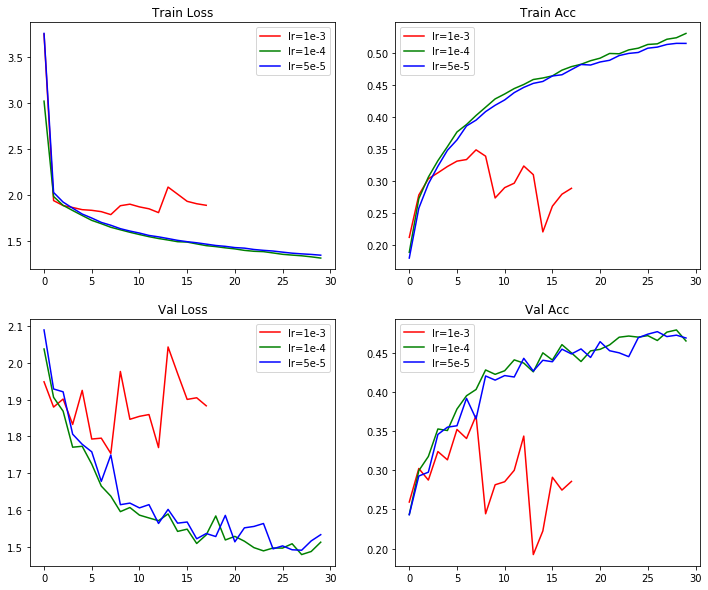

In [47]:
# plot 3 groups
plt.figure(figsize=(12, 10))
color_list = ['r','g','b']
ax1 = plt.subplot(2, 2, 1)
ax1.plot(history.history['loss'], 'r-')
ax1.plot(history1.history['loss'], 'g-')
ax1.plot(history2.history['loss'], 'b-')
ax1.legend(['lr=1e-3','lr=1e-4','lr=5e-5'])
ax1.set_title('Train Loss')
ax2 = plt.subplot(2, 2, 2)
ax2.plot(history.history['accuracy'], 'r-')
ax2.plot(history1.history['accuracy'], 'g-')
ax2.plot(history2.history['accuracy'], 'b-')
ax2.legend(['lr=1e-3','lr=1e-4','lr=5e-5'])
ax2.set_title('Train Acc')
ax3 = plt.subplot(2, 2, 3)
ax3.plot(history.history['val_loss'], 'r-')
ax3.plot(history1.history['val_loss'], 'g-')
ax3.plot(history2.history['val_loss'], 'b-')
ax3.legend(['lr=1e-3','lr=1e-4','lr=5e-5'])
ax3.set_title('Val Loss')
ax4 = plt.subplot(2, 2, 4)
ax4.plot(history.history['val_accuracy'], 'r-')
ax4.plot(history1.history['val_accuracy'], 'g-')
ax4.plot(history2.history['val_accuracy'], 'b-')
ax4.legend(['lr=1e-3','lr=1e-4','lr=5e-5'])
ax4.set_title('Val Acc')
plt.show()

## Now try adding Batch Normalization and compare the learning curves: Is it converging faster than before? Does it produce a better model? How does it affect training speed?

In [48]:
def model2():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(20):
        model.add(keras.layers.BatchNormalization())
        model.add(keras.layers.Dense(100,activation="elu",kernel_initializer="he_normal"))
    model.add(keras.layers.Dense(10,activation="softmax"))

    return model

In [49]:
# try LR = 0.0001
lr = 0.0001

model = model2()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model2_lr_1e-4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history3 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 22s 432us/sample - loss: 2.1025 - accuracy: 0.2572 - val_loss: 1.8148 - val_accuracy: 0.3465
Epoch 2/30
50000/50000 [==============================] - 16s 323us/sample - loss: 1.8218 - accuracy: 0.3452 - val_loss: 1.6742 - val_accuracy: 0.4005
Epoch 3/30
50000/50000 [==============================] - 16s 320us/sample - loss: 1.7169 - accuracy: 0.3840 - val_loss: 1.6030 - val_accuracy: 0.4305
Epoch 4/30
50000/50000 [==============================] - 16s 321us/sample - loss: 1.6600 - accuracy: 0.4070 - val_loss: 1.5467 - val_accuracy: 0.4494
Epoch 5/30
50000/50000 [==============================] - 16s 321us/sample - loss: 1.6010 - accuracy: 0.4295 - val_loss: 1.5039 - val_accuracy: 0.4602
Epoch 6/30
50000/50000 [==============================] - 16s 318us/sample - loss: 1.5581 - accuracy: 0.4444 - val_loss: 1.4706 - val_accuracy: 0.4764
Epoch 7/30
50000/50000 [====================

In [50]:
# try LR = 0.0005
lr = 0.0005

model = model2()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model2_lr_5e-4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history4 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 21s 427us/sample - loss: 1.9285 - accuracy: 0.3024 - val_loss: 1.6824 - val_accuracy: 0.3946
Epoch 2/30
50000/50000 [==============================] - 16s 321us/sample - loss: 1.7201 - accuracy: 0.3814 - val_loss: 1.5905 - val_accuracy: 0.4376
Epoch 3/30
50000/50000 [==============================] - 16s 321us/sample - loss: 1.6369 - accuracy: 0.4149 - val_loss: 1.5281 - val_accuracy: 0.4491
Epoch 4/30
50000/50000 [==============================] - 16s 319us/sample - loss: 1.5785 - accuracy: 0.4413 - val_loss: 1.4752 - val_accuracy: 0.4742
Epoch 5/30
50000/50000 [==============================] - 16s 323us/sample - loss: 1.5335 - accuracy: 0.4574 - val_loss: 1.4555 - val_accuracy: 0.4818
Epoch 6/30
50000/50000 [==============================] - 16s 324us/sample - loss: 1.4930 - accuracy: 0.4714 - val_loss: 1.4134 - val_accuracy: 0.4998
Epoch 7/30
50000/50000 [====================

In [52]:
# try LR = 0.001
lr = 0.001

model = model2()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model2_lr_1e-3.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history5 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 22s 434us/sample - loss: 1.9266 - accuracy: 0.3094 - val_loss: 1.6701 - val_accuracy: 0.4041
Epoch 2/30
50000/50000 [==============================] - 16s 319us/sample - loss: 1.7215 - accuracy: 0.3889 - val_loss: 1.5973 - val_accuracy: 0.4271
Epoch 3/30
50000/50000 [==============================] - 16s 321us/sample - loss: 1.6454 - accuracy: 0.4157 - val_loss: 1.5016 - val_accuracy: 0.4617
Epoch 4/30
50000/50000 [==============================] - 16s 320us/sample - loss: 1.5948 - accuracy: 0.4355 - val_loss: 1.5081 - val_accuracy: 0.4700
Epoch 5/30
50000/50000 [==============================] - 16s 325us/sample - loss: 1.5483 - accuracy: 0.4549 - val_loss: 1.4931 - val_accuracy: 0.4712
Epoch 6/30
50000/50000 [==============================] - 16s 326us/sample - loss: 1.5143 - accuracy: 0.4641 - val_loss: 1.4692 - val_accuracy: 0.4711
Epoch 7/30
50000/50000 [====================

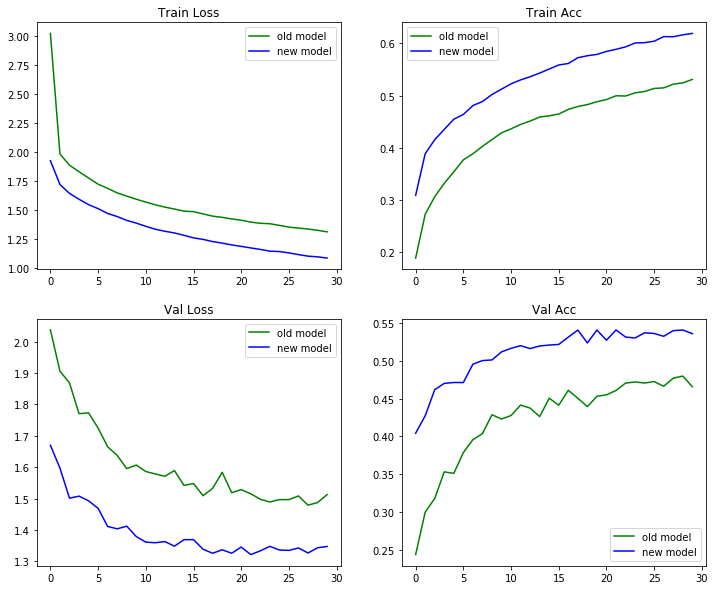

In [59]:
# plot old vs new
plt.figure(figsize=(12, 10))
color_list = ['r','g','b']
ax1 = plt.subplot(2, 2, 1)
ax1.plot(history1.history['loss'], 'g-')
ax1.plot(history5.history['loss'], 'b-')
ax1.legend(['old model','new model'])
ax1.set_title('Train Loss')
ax2 = plt.subplot(2, 2, 2)
ax2.plot(history1.history['accuracy'], 'g-')
ax2.plot(history5.history['accuracy'], 'b-')
ax2.legend(['old model','new model'])
ax2.set_title('Train Acc')
ax3 = plt.subplot(2, 2, 3)
ax3.plot(history1.history['val_loss'], 'g-')
ax3.plot(history5.history['val_loss'], 'b-')
ax3.legend(['old model','new model'])
ax3.set_title('Val Loss')
ax4 = plt.subplot(2, 2, 4)
ax4.plot(history1.history['val_accuracy'], 'g-')
ax4.plot(history5.history['val_accuracy'], 'b-')
ax4.legend(['old model','new model'])
ax4.set_title('Val Acc')
plt.show()

The new network can achieve better performance than the old one in terms of number of epochs. It converges with larger learning rate (lr = 0.001) while the original one cannot.

However, there is caveat that the time to train 1 epoch in the new model is twice as long as the old one (~320us vs ~160us).

## Try replacing Batch Normalization with SELU, and make the necessary adjustments to ensure the network self-normalizes (i.e., standardize the input features, use LeCun normal initialization, make sure the DNN contains only a sequence of dense layers, etc.)

In [56]:
def model3():
    model = keras.models.Sequential()
    model.add(keras.layers.Flatten(input_shape=input_shape))
    # adding batch normalization after input is same as normalizing data
    model.add(keras.layers.BatchNormalization())
    for layer in range(20):
        model.add(keras.layers.Dense(100,activation="selu",kernel_initializer="lecun_normal"))
    model.add(keras.layers.Dense(10, activation="softmax"))
    
    return model

In [55]:
# try LR = 0.001
lr = 0.001

model = model3()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model3_lr_1e-3.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history6 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 15s 308us/sample - loss: 1.9855 - accuracy: 0.2812 - val_loss: 1.8194 - val_accuracy: 0.3473
Epoch 2/30
50000/50000 [==============================] - 12s 250us/sample - loss: 1.7971 - accuracy: 0.3556 - val_loss: 1.6741 - val_accuracy: 0.4096
Epoch 3/30
50000/50000 [==============================] - 13s 251us/sample - loss: 1.7367 - accuracy: 0.3790 - val_loss: 1.6959 - val_accuracy: 0.3969
Epoch 4/30
50000/50000 [==============================] - 12s 237us/sample - loss: 1.6923 - accuracy: 0.3984 - val_loss: 1.6150 - val_accuracy: 0.4345
Epoch 5/30
50000/50000 [==============================] - 12s 238us/sample - loss: 1.6515 - accuracy: 0.4127 - val_loss: 1.6149 - val_accuracy: 0.4266
Epoch 6/30
50000/50000 [==============================] - 12s 247us/sample - loss: 1.6212 - accuracy: 0.4256 - val_loss: 1.6166 - val_accuracy: 0.4256
Epoch 7/30
50000/50000 [====================

In [58]:
# try LR = 0.0001
lr = 0.0001

model = model3()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model3_lr_1e-4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history6 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 287us/sample - loss: 1.8517 - accuracy: 0.3351 - val_loss: 1.6932 - val_accuracy: 0.4009
Epoch 2/30
50000/50000 [==============================] - 13s 266us/sample - loss: 1.6499 - accuracy: 0.4139 - val_loss: 1.5702 - val_accuracy: 0.4391
Epoch 3/30
50000/50000 [==============================] - 12s 245us/sample - loss: 1.5586 - accuracy: 0.4466 - val_loss: 1.5125 - val_accuracy: 0.4661
Epoch 4/30
50000/50000 [==============================] - 13s 264us/sample - loss: 1.4972 - accuracy: 0.4694 - val_loss: 1.5062 - val_accuracy: 0.4654
Epoch 5/30
50000/50000 [==============================] - 12s 249us/sample - loss: 1.4475 - accuracy: 0.4875 - val_loss: 1.4654 - val_accuracy: 0.4832
Epoch 6/30
50000/50000 [==============================] - 12s 246us/sample - loss: 1.4021 - accuracy: 0.5035 - val_loss: 1.4388 - val_accuracy: 0.4851
Epoch 7/30
50000/50000 [====================

In [57]:
# try LR = 0.0001
lr = 0.0001

model = model3()

model.compile(loss="sparse_categorical_crossentropy",
              optimizer=keras.optimizers.Adam(lr=lr),
              metrics=["accuracy"],
              verbose=1  )

checkpoint_cb = keras.callbacks.ModelCheckpoint("model3_lr_1e-4.h5", save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

# train model
history7 = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_test, y_test) ,
                    callbacks=[checkpoint_cb,early_stopping_cb])

Train on 50000 samples, validate on 10000 samples
Epoch 1/30
50000/50000 [==============================] - 14s 279us/sample - loss: 1.8537 - accuracy: 0.3365 - val_loss: 1.6874 - val_accuracy: 0.4009
Epoch 2/30
50000/50000 [==============================] - 12s 239us/sample - loss: 1.6557 - accuracy: 0.4106 - val_loss: 1.6079 - val_accuracy: 0.4317
Epoch 3/30
50000/50000 [==============================] - 13s 268us/sample - loss: 1.5704 - accuracy: 0.4411 - val_loss: 1.5269 - val_accuracy: 0.4557
Epoch 4/30
50000/50000 [==============================] - 13s 267us/sample - loss: 1.5078 - accuracy: 0.4639 - val_loss: 1.4880 - val_accuracy: 0.4694
Epoch 5/30
50000/50000 [==============================] - 13s 254us/sample - loss: 1.4576 - accuracy: 0.4829 - val_loss: 1.4665 - val_accuracy: 0.4798
Epoch 6/30
50000/50000 [==============================] - 12s 244us/sample - loss: 1.4123 - accuracy: 0.4987 - val_loss: 1.4436 - val_accuracy: 0.4865
Epoch 7/30
50000/50000 [====================